# **1. Practical Tasks on Ensemble Learning**


In [1]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Data loading
data = pd.read_csv('drive/MyDrive/ColabDatasets/android_traffic.csv')
X = data.loc[:, :'dns_query_times']
y = data['type']

# Split the dataset into train(80%) and test set(20%)
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
#Create models
clf1 = RandomForestClassifier(max_depth=15)
clf2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15))
clf3 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=15))

#можно менять параметры max_features, impurity у bagging и ada?

In [5]:
# Parameters for RandomForestClassifier model
parameters1 = {'n_estimators': [30, 40, 50, 60, 70], 
               'max_features': ['log2', 'sqrt'],
               'min_impurity_decrease': np.logspace(-6, -9, num=13)} 
clf_grid1 = GridSearchCV(clf1, parameters1, cv=5)
clf_grid1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=15),
             param_grid={'max_features': ['log2', 'sqrt'],
                         'min_impurity_decrease': array([1.00000000e-06, 5.62341325e-07, 3.16227766e-07, 1.77827941e-07,
       1.00000000e-07, 5.62341325e-08, 3.16227766e-08, 1.77827941e-08,
       1.00000000e-08, 5.62341325e-09, 3.16227766e-09, 1.77827941e-09,
       1.00000000e-09]),
                         'n_estimators': [30, 40, 50, 60, 70]})

In [6]:
# Best estimator for RandomForestClassifier
clf_grid1.best_estimator_

RandomForestClassifier(max_depth=15, max_features='sqrt',
                       min_impurity_decrease=1.7782794100389228e-09,
                       n_estimators=70)

In [7]:
# Apply best estimator for RandomForestClassifier
clf1 = RandomForestClassifier(max_depth=15, max_features='log2',
                       min_impurity_decrease=1e-07, n_estimators=60)
clf1.fit(X_train, y_train)
print(clf1.score(x_test, y_test))

0.9005736137667304


In [8]:
# Score
clf_grid1.score(x_test, y_test)

0.8948374760994264

In [9]:
# Parameters for BaggingClassifier model
parameters2 = {'n_estimators': [30, 40, 50, 60, 70], 
               'base_estimator__max_features': ['log2', 'sqrt'], #если auto убрать, то в best будет log2 
               'base_estimator__min_impurity_decrease': np.logspace(-6, -9, num=13)}

clf_grid2 = GridSearchCV(clf2, parameters2, cv=5)
clf_grid2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15)),
             param_grid={'base_estimator__max_features': ['log2', 'sqrt'],
                         'base_estimator__min_impurity_decrease': array([1.00000000e-06, 5.62341325e-07, 3.16227766e-07, 1.77827941e-07,
       1.00000000e-07, 5.62341325e-08, 3.16227766e-08, 1.77827941e-08,
       1.00000000e-08, 5.62341325e-09, 3.16227766e-09, 1.77827941e-09,
       1.00000000e-09]),
                         'n_estimators': [30, 40, 50, 60, 70]})

In [10]:
# Best estimator for BaggingClassifier
clf_grid2.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15,
                                                        max_features='log2',
                                                        min_impurity_decrease=1e-09),
                  n_estimators=70)

In [11]:
# Apply best estimator for BaggingClassifier
clf2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15,
                                                        max_features='sqrt',
                                                        min_impurity_decrease=3.1622776601683795e-09),
                  n_estimators=40)
clf2.fit(X_train, y_train)
print(clf2.score(x_test, y_test))

0.8948374760994264


In [12]:
# Score
clf_grid2.score(x_test, y_test)

0.8986615678776291

In [13]:
# Parameters for AdaBoostClassifier model
parameters3 = {'n_estimators': [30, 40, 50, 60, 70],
               'base_estimator__max_features': ['log2', 'sqrt'],
               'base_estimator__min_impurity_decrease': np.logspace(-6, -9, num=13)} 
clf_grid3 = GridSearchCV(clf3, parameters3, cv=5)
clf_grid3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=15)),
             param_grid={'base_estimator__max_features': ['log2', 'sqrt'],
                         'base_estimator__min_impurity_decrease': array([1.00000000e-06, 5.62341325e-07, 3.16227766e-07, 1.77827941e-07,
       1.00000000e-07, 5.62341325e-08, 3.16227766e-08, 1.77827941e-08,
       1.00000000e-08, 5.62341325e-09, 3.16227766e-09, 1.77827941e-09,
       1.00000000e-09]),
                         'n_estimators': [30, 40, 50, 60, 70]})

In [14]:
# Best estimator for AdaBoostClassifier
clf_grid3.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=15,
                                                         max_features='log2',
                                                         min_impurity_decrease=1e-09))

In [15]:
# Apply best estimator for AdaBoostClassifier
clf3 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=15,
                                                         max_features='log2',
                                                         min_impurity_decrease=3.162277660168379e-08),
                   n_estimators=40)
clf3.fit(X_train, y_train)
print(clf3.score(x_test, y_test))

0.8706182281708095


In [16]:
# Score
clf_grid3.score(x_test, y_test)

0.8840025493945188

The **AdaBoostClassifier** (0.905) model performed the best on the test set in comparing with *RandomForestClassifier* (0.899) and *BaggingClassifier* (0.8967). <br>
An AdaBoost classifier is a meta-estimator that *begins by fitting a classifier on the original dataset* and *then fits additional copies of the classifier on the same dataset* but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.



Bagging tree ensemle model should have deeper base learner because it will give better performance. Ada Boost does not **really** depend on max depth of the base model; therefore, we don't need to have deep base model for AdaBoost. RandomForest tree accuracy will be higher for deeper cases.


**ehek**?

In [17]:
# Initializing the models with the best parameters
# clf1 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
#                        criterion='gini', max_depth=15, max_features=7,
#                        max_leaf_nodes=None, max_samples=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=1, min_samples_split=2,
#                        min_weight_fraction_leaf=0.0, n_estimators=40,
#                        n_jobs=None, oob_score=False, random_state=None,
#                        verbose=0, warm_start=False)
# clf2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
#                                                         class_weight=None,
#                                                         criterion='gini',
#                                                         max_depth=15,
#                                                         max_features='auto',
#                                                         max_leaf_nodes=None,
#                                                         min_impurity_decrease=0.0,
#                                                         min_impurity_split=None,
#                                                         min_samples_leaf=1,
#                                                         min_samples_split=2,
#                                                         min_weight_fraction_leaf=0.0,
#                                                         presort='deprecated',
#                                                         random_state=None,
#                                                         splitter='best'),
#                   bootstrap=True, bootstrap_features=False, max_features=7,
#                   max_samples=1.0, n_estimators=80, n_jobs=None,
#                   oob_score=False, random_state=None, verbose=0,
#                   warm_start=False)
# clf3 = AdaBoostClassifier(algorithm='SAMME.R',
#                    base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
#                                                          class_weight=None,
#                                                          criterion='gini',
#                                                          max_depth=15,
#                                                          max_features='auto',
#                                                          max_leaf_nodes=None,
#                                                          min_impurity_decrease=0.0,
#                                                          min_impurity_split=None,
#                                                          min_samples_leaf=1,
#                                                          min_samples_split=2,
#                                                          min_weight_fraction_leaf=0.0,
#                                                          presort='deprecated',
#                                                          random_state=None,
#                                                          splitter='best'),
#                    learning_rate=1.0, n_estimators=100, random_state=None)

In [18]:
#  Fine tune max_depth from 5 to 25
# For RandomForestClassifier
parameters1 = {'max_depth': list(range(5,26))} 
# For Bagging and AdaBoostClassifier
parameters2 = {'base_estimator__max_depth': list(range(5,26))} 
clf_grid1 = GridSearchCV(clf1, parameters1, cv=5)
clf_grid1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=15, max_features='log2',
                                              min_impurity_decrease=1e-07,
                                              n_estimators=60),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25]})

In [19]:
clf_grid2 = GridSearchCV(clf2, parameters2, cv=5)
clf_grid2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15,
                                                                               max_features='sqrt',
                                                                               min_impurity_decrease=3.1622776601683795e-09),
                                         n_estimators=40),
             param_grid={'base_estimator__max_depth': [5, 6, 7, 8, 9, 10, 11,
                                                       12, 13, 14, 15, 16, 17,
                                                       18, 19, 20, 21, 22, 23,
                                                       24, 25]})

In [20]:
clf_grid3 = GridSearchCV(clf3, parameters2, cv=5)
clf_grid3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=15,
                                                                                max_features='log2',
                                                                                min_impurity_decrease=3.162277660168379e-08),
                                          n_estimators=40),
             param_grid={'base_estimator__max_depth': [5, 6, 7, 8, 9, 10, 11,
                                                       12, 13, 14, 15, 16, 17,
                                                       18, 19, 20, 21, 22, 23,
                                                       24, 25]})

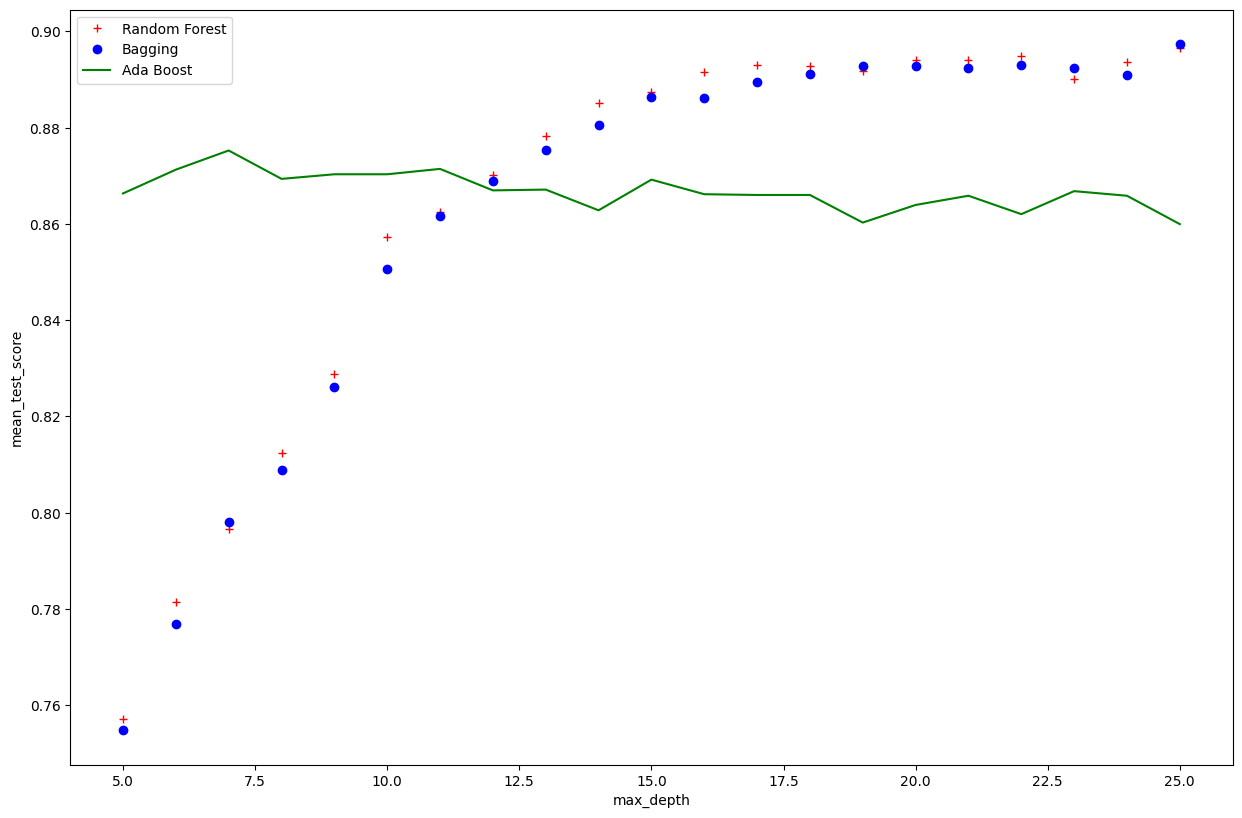

In [21]:
# Plots
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 10), dpi=100)
plt.plot(list(range(5,26)), clf_grid1.cv_results_['mean_test_score'], 'r+', label='Random Forest')
plt.plot(list(range(5,26)), clf_grid2.cv_results_['mean_test_score'], 'bo', label='Bagging')
plt.plot(list(range(5,26)), clf_grid3.cv_results_['mean_test_score'], 'g-', label='Ada Boost')
plt.xlabel('max_depth')
plt.ylabel('mean_test_score')
# plt.xscale('log')
plt.legend()
plt.show()

# **2. Practical Tasks on CNN**

In [22]:
#Import libraries
import pandas as pd
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import os

In [23]:
# Preprocess and visualize the dataset

# Read all images and convert them to gray with cv2.ctvColor()
images = [cv2.imread(file) for file in sorted(glob.glob("/content/drive/MyDrive/ColabDatasets/gi4e_database/images/*.png"))]

gray_images = []
for img in images:   
    # imgUMat = np.float32(img)
    # gray_images.append(cv2.cvtColor(imgUMat, cv2.COLOR_BGR2GRAY))
    gray_images.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

# Read annotation for images
# annotations_path = sorted(glob.glob(os.path.join(os.getcwd(), "/content/drive/MyDrive/ColabDatasets/gi4e_database/labels", "*.txt")))
annotations_path = '/content/drive/MyDrive/ColabDatasets/gi4e_database/labels/image_labels.txt'
annotations = {}
with open(annotations_path) as f:
  text = f.read().split('\n')
  for t in text:
    words = t.split()
    if 'img_name' in annotations:
      annotations['img_name'].append(words[0])
      annotations['x1'].append(words[1])
      annotations['y1'].append(words[2])
      annotations['x2'].append(words[3])
      annotations['y2'].append(words[4])
      annotations['x3'].append(words[5])
      annotations['y3'].append(words[6])
      annotations['x4'].append(words[7])
      annotations['y4'].append(words[8])
      annotations['x5'].append(words[9])
      annotations['y5'].append(words[10])
      annotations['x6'].append(words[11])
      annotations['y6'].append(words[12])
    else:
      annotations['img_name'] = [words[0]]
      annotations['x1'] = [words[1]]
      annotations['y1'] = [words[2]]
      annotations['x2'] = [words[3]]
      annotations['y2'] = [words[4]]
      annotations['x3'] = [words[5]]
      annotations['y3'] = [words[6]]
      annotations['x4'] = [words[7]]
      annotations['y4'] = [words[8]]
      annotations['x5'] = [words[9]]
      annotations['y5'] = [words[10]]
      annotations['x6'] = [words[11]]
      annotations['y6'] = [words[12]]


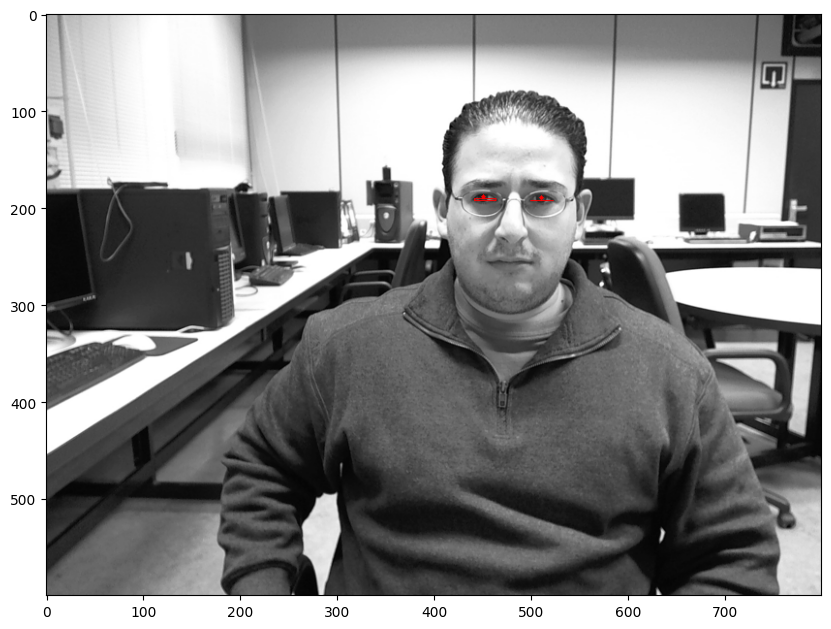

In [24]:
# Visualize one image, draw eye corners and iris centers on it
def visualize(idx=0):
  image = gray_images[idx].copy()
  image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
  color = (250, 0, 0)
  thickness = 1
  # left eye
  image = cv2.rectangle(image, 
                        (int(float(annotations['x1'][idx])), int(float(annotations['y1'][idx]))), 
                        (int(float(annotations['x3'][idx])), int(float(annotations['y3'][idx]))), 
                        color, 
                        thickness)
  # right eye
  image = cv2.rectangle(image, 
                      (int(float(annotations['x4'][idx])), int(float(annotations['y4'][idx]))), 
                      (int(float(annotations['x6'][idx])), int(float(annotations['y6'][idx]))), 
                      color, 
                      thickness)
  # left eye iris
  image = cv2.circle(image, (int(float(annotations['x2'][idx])), int(float(annotations['y2'][idx]))), 2, color, -1)
  # right eye iris
  image = cv2.circle(image, (int(float(annotations['x5'][idx])), int(float(annotations['y5'][idx]))), 2, color, -1)
  plt.figure(figsize=(10, 8), dpi=100)
  plt.imshow(image)
  plt.show()
visualize(idx=100)

In [25]:
# Normalize images
normalized = np.array(gray_images.copy(), dtype=np.float)
for i in range(len(gray_images)):
  for j in range(len(gray_images[i])):
    for k in range(len(gray_images[i][j])):
      normalized[i][j][k] = np.float(gray_images[i][j][k] / 255.0)

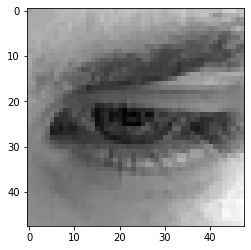

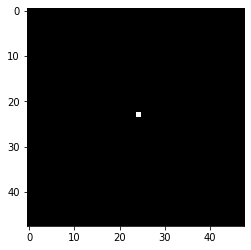

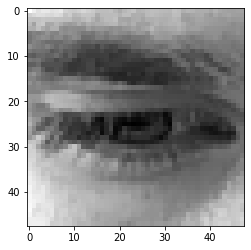

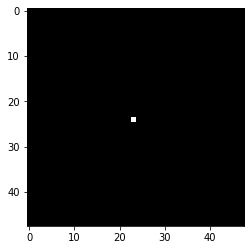

In [26]:
#crop eye region
def crop_eye(idx):
  x1 = int(float(annotations['x1'][idx]))
  y1 = int(float(annotations['y1'][idx]))
  x2 = int(float(annotations['x2'][idx]))
  y2 = int(float(annotations['y2'][idx]))
  x3 = int(float(annotations['x3'][idx]))
  y3 = int(float(annotations['y3'][idx]))
  x4 = int(float(annotations['x4'][idx]))
  y4 = int(float(annotations['y4'][idx]))
  x5 = int(float(annotations['x5'][idx]))
  y5 = int(float(annotations['y5'][idx]))
  x6 = int(float(annotations['x6'][idx]))
  y6 = int(float(annotations['y6'][idx]))
  image = normalized[idx]
  # left eye
  # print(x1, y1, x2, y2, x3, y3)
  center_x = (x3 + x1) // 2
  center_y = (y3 + y1) // 2
  left_eye = image[center_y - 24: center_y + 24, center_x - 24: center_x + 24]
  left_mask = np.zeros((48, 48))
  # print(center_x, center_y)
  # print(x2, 24 + (x2-center_x))
  # print(y2, 24 + y2 - center_y)
  left_mask[24 + (y2 - center_y)][24 + x2 - center_x] = 1
  # right eye
  center_x = (x4 + x6) // 2
  center_y = (y4 + y6) // 2
  right_eye = image[center_y-24: center_y+24, center_x-24: center_x+24]
  right_mask = np.zeros((48, 48))
  # print(center_x, center_y)
  # print(x5, 24 + (x5-center_x))
  # print(y5, 24 + y5 - center_y)
  right_mask[24 + (y5 - center_y)][24 + x5 - center_x] = 1
  return left_eye, left_mask, right_eye, right_mask

# visualize cropping
left_eye, left_mask, right_eye, right_mask = crop_eye(10)

plt.imshow(left_eye, cmap='gray')
plt.show()
plt.imshow(left_mask, cmap='gray')
plt.show()
plt.imshow(right_eye, cmap='gray')
plt.show()
plt.imshow(right_mask, cmap='gray')
plt.show()

In [27]:
# apply cropping to every image
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import torch
from torch import nn

X = []
y = []
for idx in range(len(normalized)):
  left_eye, left_mask, right_eye, right_mask = crop_eye(idx)
  X.append(left_eye)
  X.append(right_eye)
  y.append(left_mask)
  y.append(right_mask)

X_train, x_test, y_train, y_test = train_test_split(X, y)

train_dataset = TensorDataset(torch.tensor(np.array(X_train), dtype=torch.float), 
                              torch.tensor(np.array(y_train), dtype=torch.float))
test_dataset = TensorDataset(torch.tensor(np.array(x_test), dtype=torch.float), 
                             torch.tensor(np.array(y_test), dtype=torch.float))
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [28]:
from torch.optim import Adam
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.nn import MSELoss
import torch.nn.functional as F
# Building the CNN model
class Net(nn.Module):
    def __init__(self):
      super().__init__()
      self.conv1 = nn.Conv2d(1, 64, 3, padding=1)
      self.conv1_1 = nn.Conv2d(64, 64, 3, padding=1)
      self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
      self.conv2_2 = nn.Conv2d(128, 128, 3, padding=1)
      self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
      self.conv3_3 = nn.Conv2d(256, 256, 3, padding=1)
      self.conv4 = nn.Conv2d(128, 64, 3, padding=1)
      self.conv5 = nn.Conv2d(64, 1, 3, padding=1)
      self.pool = nn.MaxPool2d(2, 2)
      self.deconv1 = nn.ConvTranspose2d(256, 64, 4, stride=4)
      self.deconv2 = nn.ConvTranspose2d(256, 128, 2, stride=2)
      self.deconv3 = nn.ConvTranspose2d(128, 64, 2, stride=2)

    def forward(self, x):
      x = F.relu(self.conv1(x))                   # 48*48*64
      skip_connection = F.relu(self.conv1_1(x))   # 48*48*64
      x = self.pool(skip_connection)              # 24*24*64
      x = F.relu(self.conv2(x))                   # 24*24*128
      x = F.relu(self.conv2_2(x))                 # 24*24*128
      x = self.pool(x)                            # 12*12*128
      x = F.relu(self.conv3(x))                   # 12*12*256
      base = F.relu(self.conv3_3(x))              # 12*12*256

      # Base network
      x = torch.cat((F.relu(self.deconv1(base)), skip_connection), dim=1)   # 48*48*128
      # print(x.shape)
      x = F.relu(self.conv4(x))                                           # 48*48*64
      out_base = self.conv5(x)                                            # 48*48*1 --- do we need to add relu or not?
      
      # Auxiliary
      y = F.relu(self.conv3_3(base))                          # 12*12*256
      y = F.relu(self.conv3_3(y))                             # 12*12*256
      y = F.relu(self.deconv2(y))                           # 24*24*128
      y = F.relu(self.conv2_2(y))                           # 24*24*128
      y = F.relu(self.deconv3(y))                           # 48*48*64
      y = F.relu(self.conv1_1(y))                           # 48*48*64
      out_aux = self.conv5(y)                               # 48*48*1 --- do we need to add relu or not?
      return out_base, out_aux

# create model, optimizer, lr_scheduler 
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model_cnn = Net()
model_cnn.to(device)
# I use Adam parameter because it is better then sgd, adamax, rmsprop => чем лосс меньше, тем лучше
optimizer = Adam(model_cnn.parameters(), lr=1e-3)
# Also I use mse insteed mae according to paper (and it is better)
base_loss = nn.MSELoss()
lr_scheduler = ReduceLROnPlateau(optimizer)
def aux_loss(input, target):
  loss = torch.mean(torch.square(torch.sub(input, target)))
  return loss

In [29]:
# Train CNN on best combination (Adam, mse, relu)
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        data = torch.unsqueeze(data, dim=1)
        target = torch.unsqueeze(target, dim=1)
        optimizer.zero_grad()
        out_base, out_aux = model(data)
        loss = base_loss(out_base, target) + aux_loss(out_aux, data)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.item()))
            
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            data = torch.unsqueeze(data, dim=1)
            target = torch.unsqueeze(target, dim=1)
            out_base, out_aux = model(data)
            loss = base_loss(out_base, target) + aux_loss(out_aux, data)
            test_loss += loss.item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.6f}\n'.format(test_loss))

    return test_loss

In [30]:
epochs = 10

for epoch in range(1, epochs + 1):
    train(model_cnn, device, train_dataloader, optimizer, epoch)
    val_loss = test(model_cnn, device, test_dataloader)
    lr_scheduler.step(val_loss)

# Save the model
torch.save(model_cnn.state_dict(), "cnn.pt")

Train Epoch: 1 [0/1854 (0%)]	Loss: 0.162940
Train Epoch: 1 [320/1854 (17%)]	Loss: 0.052168
Train Epoch: 1 [640/1854 (34%)]	Loss: 0.044295
Train Epoch: 1 [960/1854 (52%)]	Loss: 0.029261
Train Epoch: 1 [1280/1854 (69%)]	Loss: 0.023269
Train Epoch: 1 [1600/1854 (86%)]	Loss: 0.020580

Test set: Average loss: 0.000487

Train Epoch: 2 [0/1854 (0%)]	Loss: 0.014928
Train Epoch: 2 [320/1854 (17%)]	Loss: 0.011186
Train Epoch: 2 [640/1854 (34%)]	Loss: 0.007751
Train Epoch: 2 [960/1854 (52%)]	Loss: 0.006509
Train Epoch: 2 [1280/1854 (69%)]	Loss: 0.005743
Train Epoch: 2 [1600/1854 (86%)]	Loss: 0.003751

Test set: Average loss: 0.000122

Train Epoch: 3 [0/1854 (0%)]	Loss: 0.003942
Train Epoch: 3 [320/1854 (17%)]	Loss: 0.003403
Train Epoch: 3 [640/1854 (34%)]	Loss: 0.003132
Train Epoch: 3 [960/1854 (52%)]	Loss: 0.003025
Train Epoch: 3 [1280/1854 (69%)]	Loss: 0.002692
Train Epoch: 3 [1600/1854 (86%)]	Loss: 0.005729

Test set: Average loss: 0.000219

Train Epoch: 4 [0/1854 (0%)]	Loss: 0.007593
Train Ep

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original iris center:[22 25] -- marked red
Predicted iris center: [22 25] -- marked green


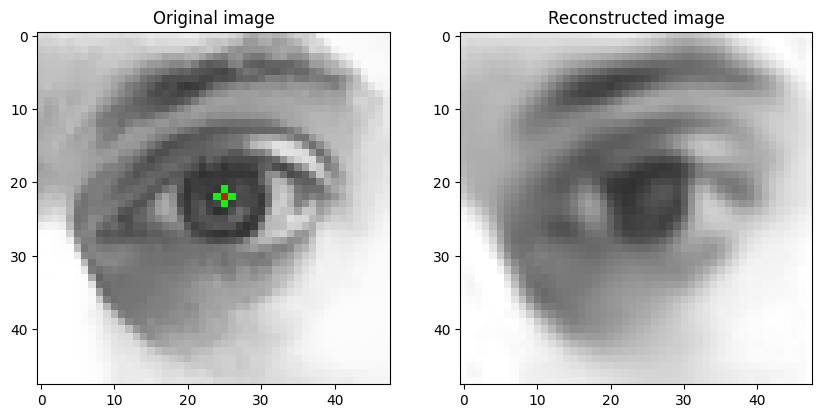

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original iris center:[23 26] -- marked red
Predicted iris center: [22 26] -- marked green


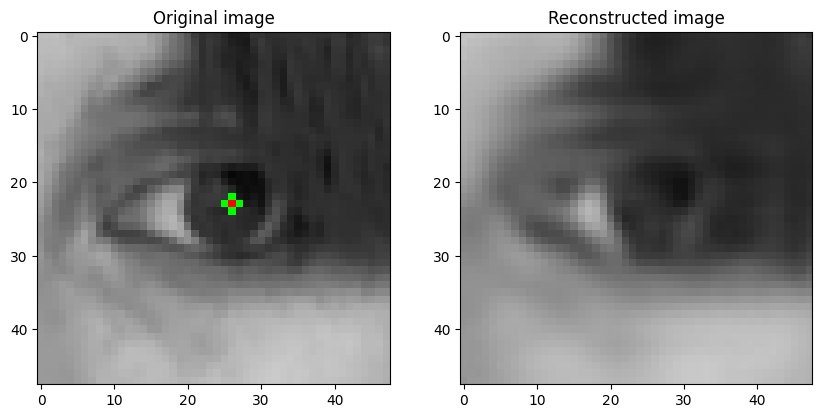

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original iris center:[23 23] -- marked red
Predicted iris center: [22 24] -- marked green


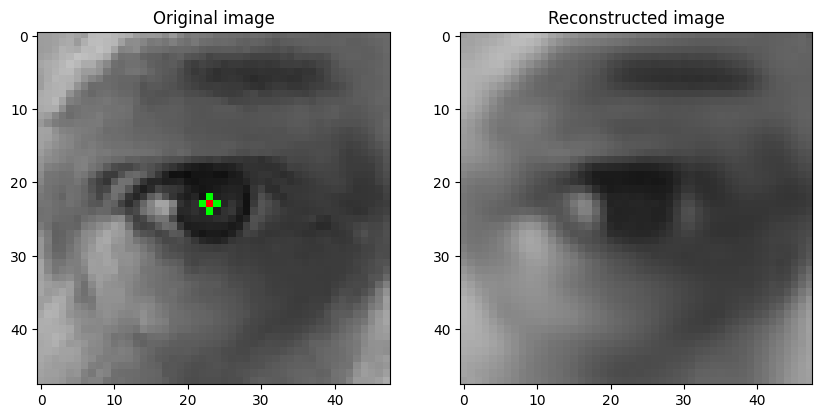

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original iris center:[22 24] -- marked red
Predicted iris center: [23 23] -- marked green


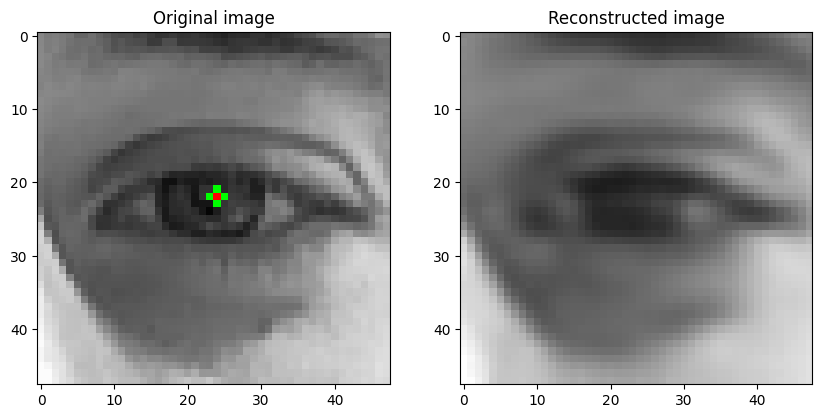

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original iris center:[22 18] -- marked red
Predicted iris center: [23 18] -- marked green


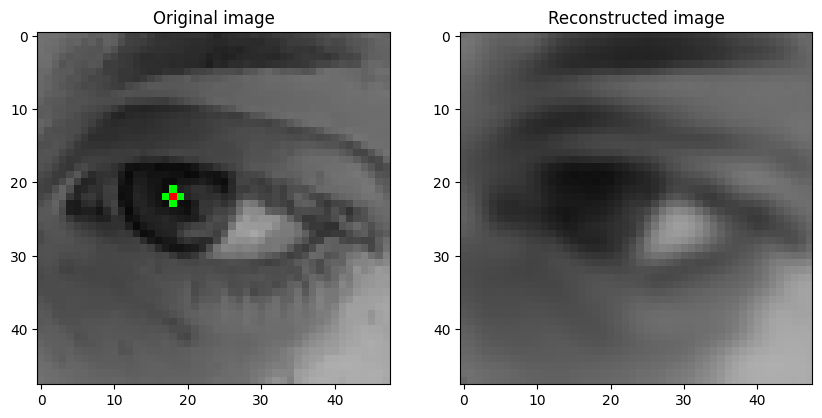

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original iris center:[21 25] -- marked red
Predicted iris center: [22 24] -- marked green


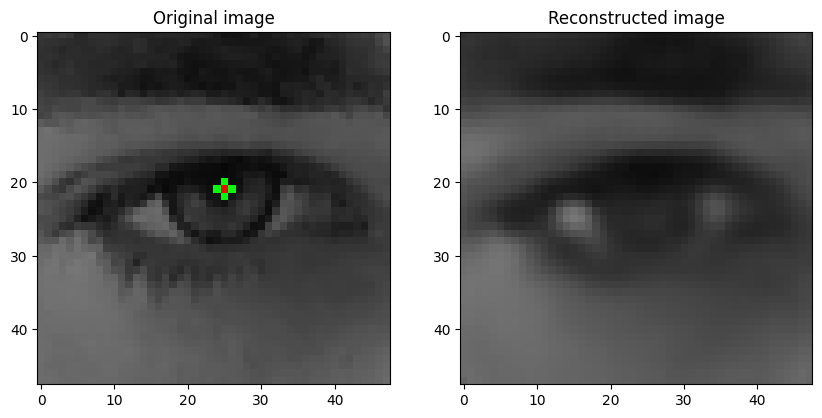

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original iris center:[23 27] -- marked red
Predicted iris center: [23 27] -- marked green


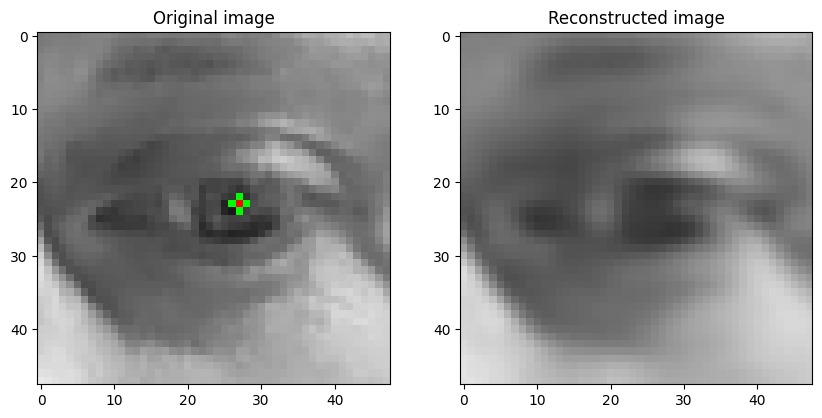

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original iris center:[23 22] -- marked red
Predicted iris center: [23 38] -- marked green


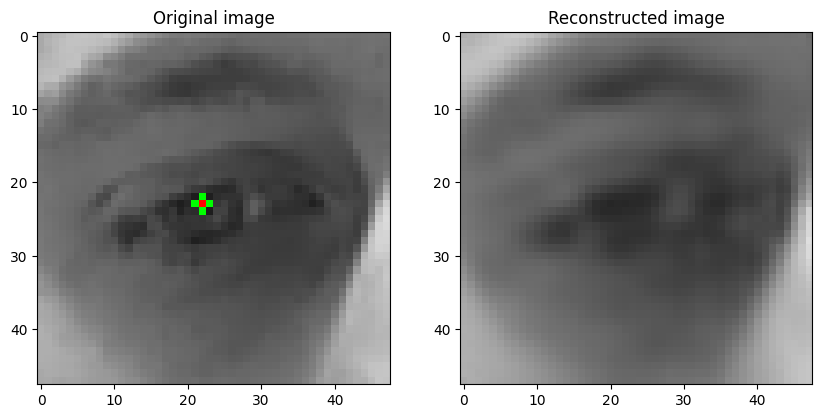

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original iris center:[22 25] -- marked red
Predicted iris center: [23 24] -- marked green


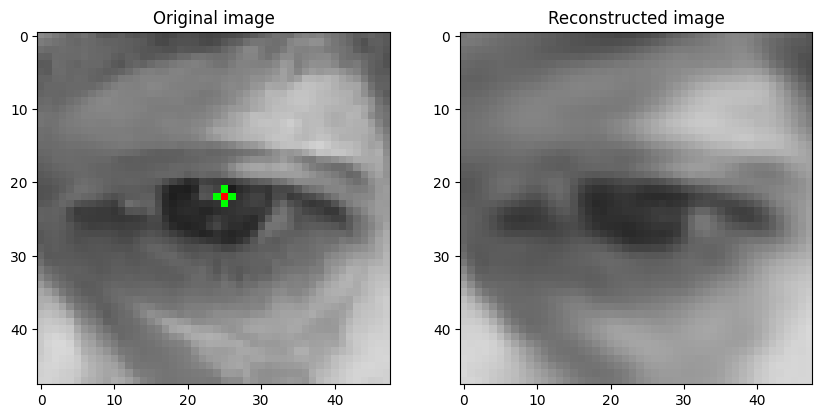

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original iris center:[22 23] -- marked red
Predicted iris center: [23 24] -- marked green


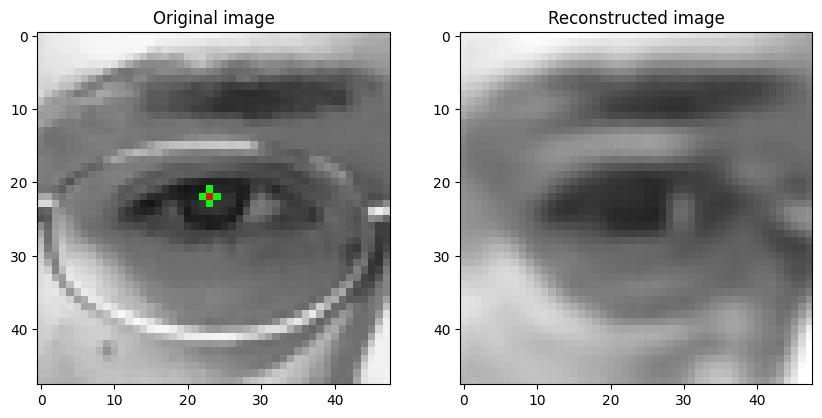

In [31]:
# Make a prediction for 10 test images.
import random
from matplotlib import pyplot as plt
# Visualise
model_cnn.eval()
with torch.no_grad():
  for i in range(10):
    idx = random.randint(0, len(X))
    data = torch.tensor(np.array(X[idx]), dtype=torch.float).to(device)
    target = torch.tensor(np.array(y[idx]), dtype=torch.float).to(device)
    data = torch.unsqueeze(torch.unsqueeze(data, dim=0), dim=1)
    out_base, out_aux = model_cnn(data)
    iris_orig = torch.squeeze((target==torch.max(target)).nonzero()).cpu().numpy()
    out_base = torch.squeeze(torch.squeeze(out_base))
    iris_model = torch.squeeze((out_base==torch.max(out_base)).nonzero()).cpu().numpy()
    print(f'Original iris center:{iris_orig} -- marked red\nPredicted iris center: {iris_model} -- marked green')
    image = torch.squeeze(data).cpu().numpy() 
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    # Draw original iris (red)
    image = cv2.circle(image, (int(iris_orig[1]), int(iris_orig[0])), 1, (255, 0, 0), -1)
    # Draw predicted iris (green). For understanding that the original iris exists(==to see red colour) we make empty pixel 
    image = cv2.circle(image, (int(iris_orig[1]), int(iris_orig[0])), 1, (0, 255, 0), 1)
    # Plot original image with predicted and original irises
    fig = plt.figure(figsize=(10, 10), dpi=100)
    ax = fig.add_subplot(1, 2, 1)
    ax.set_title('Original image')
    plt.imshow(image)
    # Plot predicted image
    ax = fig.add_subplot(1, 2, 2)
    ax.set_title('Reconstructed image')
    image = torch.squeeze(out_aux).cpu().numpy()
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    plt.imshow(image)
    plt.show()